In [1]:
import pandas as pd
import numpy as np
import sksurv
import matplotlib.pyplot as plt

In [2]:
from sksurv.datasets import load_veterans_lung_cancer
data_x, data_y = load_veterans_lung_cancer()
print('data_x.shape, data_y.shape:', data_x.shape, data_y.shape)
display(data_x.head())
display(pd.DataFrame(data_y).head())

data_x.shape, data_y.shape: (137, 6) (137,)


,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard


,Status,Survival_in_days
0,True,72.0
1,True,411.0
2,True,228.0
3,True,126.0
4,True,118.0


In [3]:
pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,Status,Survival_in_days
1,True,8.0
2,True,10.0
3,True,20.0
4,False,25.0
5,True,59.0


## kaplan_meier_estimator

[]

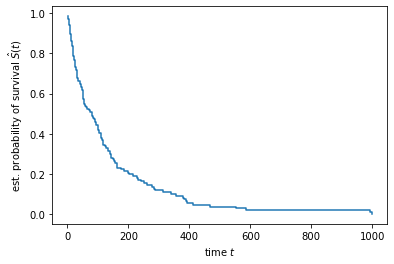

In [8]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.plot()

In [9]:
data_x["Treatment"].value_counts()

standard    69
test        68
Name: Treatment, dtype: int64

In [27]:
?plt.step

[]

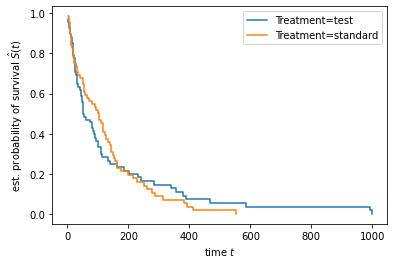

In [37]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y[data_x.Treatment=="test"]["Status"], data_y[data_x.Treatment=="test"]["Survival_in_days"])
plt.step(time, survival_prob, where="post", label="Treatment=test")
time, survival_prob = kaplan_meier_estimator(data_y[data_x.Treatment=="standard"]["Status"], data_y[data_x.Treatment=="standard"]["Survival_in_days"])
plt.step(time, survival_prob, where="post", label="Treatment=standard")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.plot()